# Worksheet 6: LS

Consider the following least-square problem

$$ \mathop{ \mathrm{min} }_x \|Ax-b\|_2^2, $$

the solution can be written as a nice formula $x=(A^TA)^{-1}A^Tb$, which comes from normal equation $A^TAx = A^Tb$.


In this part, we want to compare the computational times of using matrix inverse and solve command.

Step 1: Generate matrix $A$ with m rows and N columns, and observation vector $b$ with m rows 1 column from standard gaussian distribution (`np.random.randn`). 

Step 2: Generate several $A$ and $b$ with fixed number of rows $m=1000$ and varied number of columns $N=[1000,2000,4000,8000,16000]$  Then, use matrix inverse and solve command to solve least square problem with $A$ and $b$.

Step 3: Visualization and conclusion. The first plot is computation time (y-axis) vs N (x-axis) for inverse matrix method and solve command method. The second plot is log(time) (y-axis) vs log(N) (x-axis) (Do not use log-log command in matpotlib, write your own code to do it). You should add legends, titles, xlabels, ylabels and etc to make your plot clear. What is your conclusion? 

**Grading policy:**
1. Step 1 should be done by writting a function which generates arbitrary $A$ and $b$ for any $m$ and $N$. Since a function is written, docstring and incline comments are required.

2. Codes for step 2 are correct. This will be checked by reading your codes.

3. Visualization meets the requirements and looks reasonable.

**Remark:** Running the last example $N=16000$ may time consuming. Therefore, you can try small $N$ first to make sure that your code is correct. Then, test all $N$ values and produce plots. 


In [1]:
#Step 1
import numpy as np

def generate_matrix_and_vector(m, N):
    """
    Generate matrix A with m rows and N columns, and vector b with m rows and 1 column,
    both sampled from a standard normal distribution.
    
    Parameters:
    m (int): Number of rows
    N (int): Number of columns

    Returns:
    A (numpy.ndarray): Generated matrix of shape (m, N)
    b (numpy.ndarray): Generated vector of shape (m, 1)
    """
    A = np.random.randn(m, N)
    b = np.random.randn(m, 1)
    return A, b

#example matrix
m = 5  # Number of rows
N = 3  # Number of columns
A, b = generate_matrix_and_vector(m, N)
print("Matrix A (shape {}):\n".format(A.shape), A)
print("\nVector b (shape {}):\n".format(b.shape), b)

Matrix A (shape (5, 3)):
 [[ 0.3852283   1.03700098  0.61431949]
 [ 1.03549853 -0.39665914 -0.66539995]
 [ 0.46495648  1.21152285 -2.60682072]
 [-1.13583583 -1.73759961  0.65201648]
 [-1.5348996   0.61025261  0.27063469]]

Vector b (shape (5, 1)):
 [[ 0.38756424]
 [-0.46012057]
 [ 0.44982369]
 [-1.57828895]
 [ 0.04424102]]


In [2]:
#Step 2
import numpy as np
import time

# Reuse the function to generate A and b
def generate_matrix_and_vector(m, N):
    """
    Generate matrix A with m rows and N columns, and vector b with m rows and 1 column,
    both sampled from a standard normal distribution.
    
    Parameters:
    m (int): Number of rows
    N (int): Number of columns

    Returns:
    A (numpy.ndarray): Generated matrix of shape (m, N)
    b (numpy.ndarray): Generated vector of shape (m, 1)
    """
    A = np.random.randn(m, N)
    b = np.random.randn(m, 1)
    return A, b

# Function to compute least-square solutions using matrix inverse and solve command
def compute_least_squares(A, b):
    """
    Solve the least-square problem using two methods:
    1. Matrix inverse method.
    2. Solve command.

    Parameters:
    A (numpy.ndarray): Input matrix (m, N)
    b (numpy.ndarray): Observation vector (m, 1)

    Returns:
    inv_time (float): Time taken using the matrix inverse method
    solve_time (float): Time taken using the solve command
    """
    # Using matrix inverse
    start_time = time.time()
    x_inv = np.linalg.inv(A.T @ A) @ A.T @ b
    inv_time = time.time() - start_time

    # Using solve command
    start_time = time.time()
    x_solve = np.linalg.solve(A.T @ A, A.T @ b)
    solve_time = time.time() - start_time

    return inv_time, solve_time

# Set the number of rows and the varied number of columns
m = 1000
N_values = [1000, 2000, 4000, 8000, 16000]

# Lists to store the computation times
inv_times = []
solve_times = []

# Loop through each value of N, generate A and b, and compute the least-square solutions
for N in N_values:
    print(f"\nGenerating matrix A and vector b for N={N}...")
    
    # Generate A and b
    A, b = generate_matrix_and_vector(m, N)
    print(f"Matrix A of shape {A.shape} and vector b of shape {b.shape} generated.")
    
    # Compute the least-square solutions using both methods
    print(f"Solving least squares problem for N={N}...")
    inv_time, solve_time = compute_least_squares(A, b)
    
    # Store the computation times
    inv_times.append(inv_time)
    solve_times.append(solve_time)

    # Print the results for each N
    print(f"For N={N}: Inverse method time = {inv_time:.4f} sec, Solve command time = {solve_time:.4f} sec")

# Print the final list of times
print("\nMatrix Inverse Times:", inv_times)
print("Solve Command Times:", solve_times)


Generating matrix A and vector b for N=1000...
Matrix A of shape (1000, 1000) and vector b of shape (1000, 1) generated.
Solving least squares problem for N=1000...
For N=1000: Inverse method time = 0.1269 sec, Solve command time = 0.0460 sec

Generating matrix A and vector b for N=2000...
Matrix A of shape (1000, 2000) and vector b of shape (1000, 1) generated.
Solving least squares problem for N=2000...
For N=2000: Inverse method time = 0.6656 sec, Solve command time = 0.3278 sec

Generating matrix A and vector b for N=4000...
Matrix A of shape (1000, 4000) and vector b of shape (1000, 1) generated.
Solving least squares problem for N=4000...
For N=4000: Inverse method time = 4.1746 sec, Solve command time = 1.2233 sec

Generating matrix A and vector b for N=8000...
Matrix A of shape (1000, 8000) and vector b of shape (1000, 1) generated.
Solving least squares problem for N=8000...
For N=8000: Inverse method time = 28.1313 sec, Solve command time = 7.6005 sec

Generating matrix A an

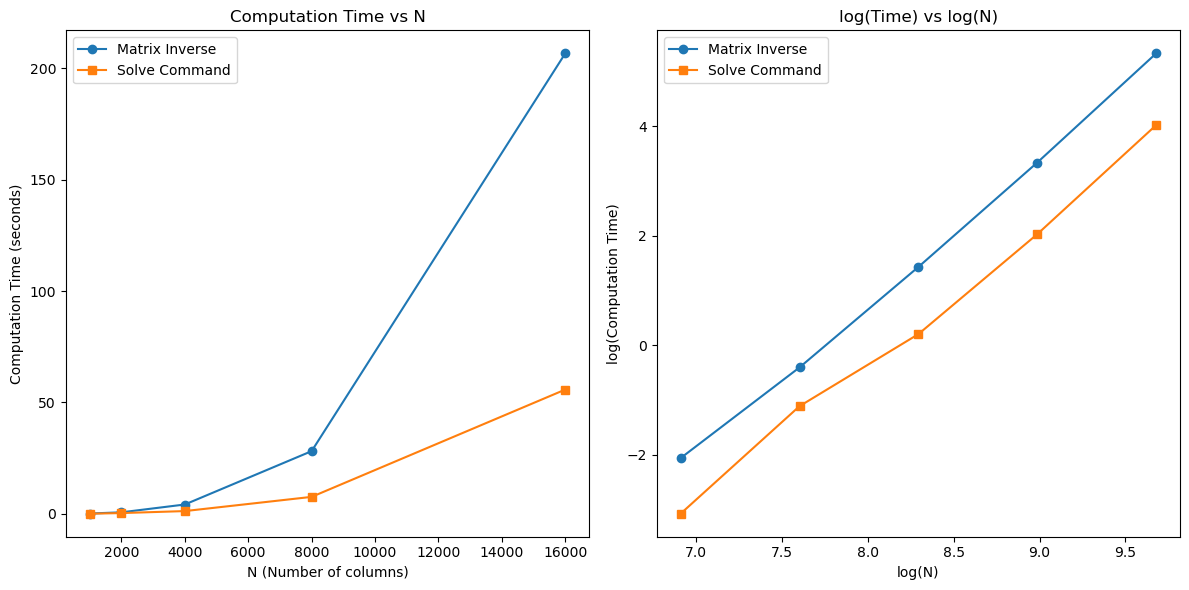

In [3]:
#Step 3
import matplotlib.pyplot as plt

# First plot: Computation time vs N
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(N_values, inv_times, label='Matrix Inverse', marker='o')
plt.plot(N_values, solve_times, label='Solve Command', marker='s')
plt.xlabel('N (Number of columns)')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs N')
plt.legend()

# Second plot: log(time) vs log(N)
log_N_values = np.log(N_values)
log_inv_times = np.log(inv_times)
log_solve_times = np.log(solve_times)

plt.subplot(1, 2, 2)
plt.plot(log_N_values, log_inv_times, label='Matrix Inverse', marker='o')
plt.plot(log_N_values, log_solve_times, label='Solve Command', marker='s')
plt.xlabel('log(N)')
plt.ylabel('log(Computation Time)')
plt.title('log(Time) vs log(N)')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# CONCLUSION

#the solve command tends to be faster than matrix inversion, especially for large n